<a href="https://colab.research.google.com/github/JeevanNaikOP/Learning_Python/blob/master/Copy_of_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.25,random_state=0)

In [31]:
print(X_train)

[[    49  74000]
 [    39 122000]
 [    35  73000]
 [    39  71000]
 [    24  23000]
 [    41  72000]
 [    29  83000]
 [    54  26000]
 [    35  44000]
 [    37  75000]
 [    29  47000]
 [    31  68000]
 [    42  54000]
 [    30 135000]
 [    52 114000]
 [    50  36000]
 [    56 133000]
 [    29  61000]
 [    30  89000]
 [    26  16000]
 [    33  31000]
 [    41  72000]
 [    36  33000]
 [    55 125000]
 [    48 131000]
 [    41  71000]
 [    30  62000]
 [    37  72000]
 [    41  63000]
 [    58  47000]
 [    30 116000]
 [    20  49000]
 [    37  74000]
 [    41  59000]
 [    49  89000]
 [    28  79000]
 [    53  82000]
 [    40  57000]
 [    60  34000]
 [    35 108000]
 [    21  72000]
 [    38  71000]
 [    39 106000]
 [    37  57000]
 [    26  72000]
 [    35  23000]
 [    54 108000]
 [    30  17000]
 [    39 134000]
 [    29  43000]
 [    33  43000]
 [    35  38000]
 [    41  45000]
 [    41  72000]
 [    39 134000]
 [    27 137000]
 [    21  16000]
 [    26  32000]
 [    31  6600

In [20]:
print(y_train)

[0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0]


In [32]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [33]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 1 0 0]


## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [35]:
print(X_train)

[[ 1.1234721   0.2132551 ]
 [ 0.14992609  1.71637474]
 [-0.23949232  0.18194011]
 [ 0.14992609  0.11931012]
 [-1.31039293 -1.38380952]
 [ 0.34463529  0.15062511]
 [-0.82361992  0.49509003]
 [ 1.6102451  -1.28986454]
 [-0.23949232 -0.72619468]
 [-0.04478312  0.24457009]
 [-0.82361992 -0.6322497 ]
 [-0.62891072  0.02536514]
 [ 0.44198989 -0.41304475]
 [-0.72626532  2.12346964]
 [ 1.4155359   1.4658548 ]
 [ 1.2208267  -0.97671462]
 [ 1.8049543   2.06083966]
 [-0.82361992 -0.1938398 ]
 [-0.72626532  0.68297999]
 [-1.11568373 -1.60301447]
 [-0.43420152 -1.13328958]
 [ 0.34463529  0.15062511]
 [-0.14213772 -1.07065959]
 [ 1.7075997   1.81031972]
 [ 1.0261175   1.99820967]
 [ 0.34463529  0.11931012]
 [-0.72626532 -0.16252481]
 [-0.04478312  0.15062511]
 [ 0.34463529 -0.13120982]
 [ 1.99966351 -0.6322497 ]
 [-0.72626532  1.52848479]
 [-1.69981133 -0.56961971]
 [-0.04478312  0.2132551 ]
 [ 0.34463529 -0.25646979]
 [ 1.1234721   0.68297999]
 [-0.92097453  0.36983006]
 [ 1.5128905   0.46377504]
 

In [36]:
print(X_test)

[[-0.72626532  0.62035   ]
 [ 0.05257148 -0.53830472]
 [-0.23949232  0.24457009]
 [-0.72626532  0.36983006]
 [-0.23949232 -0.53830472]
 [-1.01832913 -1.4777545 ]
 [-0.62891072 -1.63432946]
 [-0.14213772  2.40530458]
 [-1.89452054  0.02536514]
 [ 0.92876289 -0.75750967]
 [-0.72626532 -0.56961971]
 [-0.92097453 -0.38172976]
 [-0.04478312 -0.38172976]
 [ 0.14992609  0.30720008]
 [-1.69981133  0.58903501]
 [-0.53155612  1.55979978]
 [-0.04478312  0.30720008]
 [-1.79716594  0.55772002]
 [ 1.7075997   1.96689468]
 [-0.23949232 -1.41512451]
 [-0.23949232 -0.6322497 ]
 [ 0.92876289  2.40530458]
 [ 0.34463529 -0.50698973]
 [ 0.92876289  1.18401987]
 [-1.40774753 -1.22723456]
 [ 1.1234721   2.3113596 ]
 [-0.92097453  0.62035   ]
 [-0.82361992  0.40114505]
 [-0.04478312 -0.16252481]
 [-0.53155612  0.58903501]
 [-1.60245673  0.65166499]
 [-0.04478312  0.36983006]
 [ 1.9023089  -0.2251548 ]
 [-0.04478312 -0.44435974]
 [-1.31039293 -0.28778478]
 [-1.89452054 -0.47567474]
 [-1.50510213  0.43246005]
 

## Training the Logistic Regression model on the Training set

In [37]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [38]:
print((classifier.predict(sc.transform([[30,50000]]))))

[0]


## Predicting the Test set results

In [39]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]

## Making the Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[175  11]
 [ 51  63]]


0.7933333333333333

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


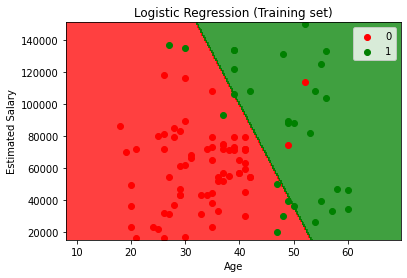

In [41]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


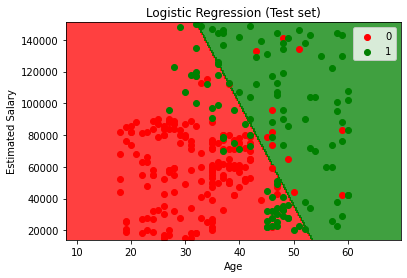

In [42]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()